<a href="https://colab.research.google.com/github/jonnythebard/tf2_workbook/blob/master/lstm_for_long_sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, GRU, LSTM, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.0.0


In [0]:
# create the dataset

T = 10
long_T = 30
D = 1
X = []
short_Y = []
long_Y = []

def get_label(x, i1, i2, i3):
  # return a value depending on X
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  short_Y.append(get_label(x, -1, -2, -3)) # short distance dataset for rnn
  long_Y.append(get_label(x, 0, 1, 2)) # long distance dataset for rnn
  

X = np.array(X)
X = np.expand_dims(X, -1)
short_Y = np.array(short_Y)
long_Y = np.array(long_Y)

In [3]:
# build simple rnn
i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation="sigmoid")(x)
model = Model(i ,x)
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [4]:
r = model.fit(X, short_Y, epochs=200, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 930us/sample - loss: 0.7006 - accuracy: 0.5228 - val_loss: 0.6873 - val_accuracy: 0.5516
Epoch 2/200
2500/2500 [==============================] - 1s 340us/sample - loss: 0.6712 - accuracy: 0.6108 - val_loss: 0.6585 - val_accuracy: 0.6452
Epoch 3/200
2500/2500 [==============================] - 1s 342us/sample - loss: 0.6129 - accuracy: 0.7156 - val_loss: 0.5765 - val_accuracy: 0.7412
Epoch 4/200
2500/2500 [==============================] - 1s 346us/sample - loss: 0.5260 - accuracy: 0.7744 - val_loss: 0.4799 - val_accuracy: 0.8152
Epoch 5/200
2500/2500 [==============================] - 1s 351us/sample - loss: 0.4226 - accuracy: 0.8484 - val_loss: 0.3805 - val_accuracy: 0.8728
Epoch 6/200
2500/2500 [==============================] - 1s 340us/sample - loss: 0.3406 - accuracy: 0.8872 - val_loss: 0.3124 - val_accuracy: 0.8976
Epoch 7/200
2500/2500 [==============================] - 1

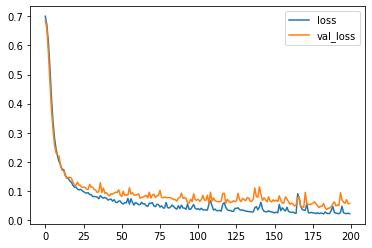

In [5]:
# Plot the loss
# simple rnn works fine on short distance data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [6]:
# let's try long distance data to simple rnn
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i ,x)
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"])
model.summary()
r = model.fit(X, long_Y, epochs=200, validation_split=0.5)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 736us/sample - loss: 0.6926 - accuracy: 0.5328 - val_loss: 0.6867 - val_accuracy: 0.5468
Epoch 2/200
2500/2500 [==============================] - 1s 340us/sample - loss: 0.6826 - accuracy: 0.5636 - val_loss: 0.6698 - val_accuracy: 0.5732
Epoch 3/200
2500/2500 [========================

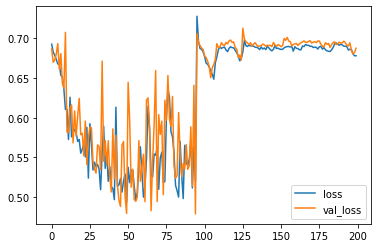

In [7]:
# Plot the loss
# simple rnn doesn't really work on long distance data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [8]:
# let's try lstm on long distance data
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i ,x)
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"])
model.summary()
r = model.fit(X, long_Y, epochs=200, validation_split=0.5)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6926 - accuracy: 0.5236 - val_loss: 0.6932 - val_accuracy: 0.5080
Epoch 2/200
2500/2500 [==============================] - 1s 208us/sample - loss: 0.6928 - accuracy: 0.5116 - val_loss: 0.6934 - val_accuracy: 0.5052
Epoch 3/200
2500/2500 [========================

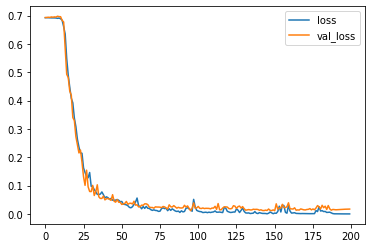

In [9]:
# Plot the loss
# lstm works fine on long distance data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [0]:
# create very long the dataset

T = 30
D = 1
X = []
long_Y = []

def get_label(x, i1, i2, i3):
  # return a value depending on X
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  long_Y.append(get_label(x, 0, 1, 2)) # long distance dataset for rnn
  

X = np.array(X)
X = np.expand_dims(X, -1)
long_Y = np.array(long_Y)

In [11]:
# lets try very long data to lstm
i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i ,x)
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"])
model.summary()
r = model.fit(X, long_Y, epochs=200, validation_split=0.5)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 955us/sample - loss: 0.6947 - accuracy: 0.4912 - val_loss: 0.6936 - val_accuracy: 0.4976
Epoch 2/200
2500/2500 [==============================] - 1s 222us/sample - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6958 - val_accuracy: 0.4972
Epoch 3/200
2500/2500 [======================

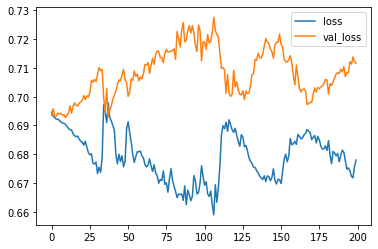

In [12]:
# Plot the loss
# lstm doesn't really work on very long sequence data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [15]:
# let's try lstm with globak max pooling on very long sequence data
i = Input(shape=(T, D))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i ,x)
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"])
r = model.fit(X, long_Y, epochs=200, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 951us/sample - loss: 0.6942 - accuracy: 0.5072 - val_loss: 0.6920 - val_accuracy: 0.5080
Epoch 2/200
2500/2500 [==============================] - 1s 251us/sample - loss: 0.6925 - accuracy: 0.5140 - val_loss: 0.6928 - val_accuracy: 0.5028
Epoch 3/200
2500/2500 [==============================] - 1s 224us/sample - loss: 0.6924 - accuracy: 0.5052 - val_loss: 0.6915 - val_accuracy: 0.5168
Epoch 4/200
2500/2500 [==============================] - 1s 234us/sample - loss: 0.6925 - accuracy: 0.5052 - val_loss: 0.6913 - val_accuracy: 0.5060
Epoch 5/200
2500/2500 [==============================] - 1s 227us/sample - loss: 0.6919 - accuracy: 0.5016 - val_loss: 0.6925 - val_accuracy: 0.5024
Epoch 6/200
2500/2500 [==============================] - 1s 238us/sample - loss: 0.6912 - accuracy: 0.5132 - val_loss: 0.6908 - val_accuracy: 0.5004
Epoch 7/200
2500/2500 [==============================] - 1

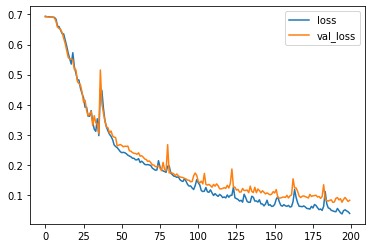

In [16]:
# Plot the loss
# lstm with global max pooling works fine on very long sequence data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()